In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the source data for each panel 
panel_b = pd.read_excel('./figure4_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_b').iloc[:,1:-1]
panel_c = pd.read_excel('./figure4_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_c').iloc[:,1:]
panel_d = pd.read_excel('./figure4_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_d').iloc[:6,1:]
panel_e = pd.read_excel('./figure4_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_e').iloc[:,1:]


In [2]:
# define the relevant statistical comparisons 
order = ['Jaw', 'Lip aperture', 'Mouth width']
box_pairs = []
for a in order: 
    box_pairs.extend([
        ((str(a), 'Avatar-Person'), (str(a), 'Person-Person')), 
        ((str(a), 'Avatar-Person'), (str(a), 'Chance, Avatar-Person')), 
        ((str(a), 'Person-Person'), (str(a), 'Chance, Person-Person')),         
    ])


In [3]:
from scipy.stats import wilcoxon, mannwhitneyu
from statsmodels.stats.multitest import multipletests
# compute the statistical values using non-parametric tests corrected for multiple comparisons with holm-bonf
p_values = []
just_p_values = []
pval_dict = {}

for b in box_pairs: 
    sdf = panel_c.loc[panel_c['artic'] == b[0][0]]
    sdf1 = sdf.loc[sdf['Comparison'] == b[0][1]]['r-value'].values
    sdf2 = sdf.loc[sdf['Comparison'] == b[1][1]]['r-value'].values
    p_values.append((b[0][0] +': ' + b[0][1] + ' vs. ' + b[1][1], mannwhitneyu(sdf1, sdf2)))
    just_p_values.append(mannwhitneyu(sdf1, sdf2).pvalue)
    pval_dict[p_values[-1][0]] = just_p_values[-1]

correction = multipletests(just_p_values, alpha=0.01, method='holm')[1]
test, pcor, praw, name, comp = [], [], [], [], []
for v, d in zip(p_values, correction):
    pcor.append(d)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


p-value annotation legend:
ns: 1.00e-02 < p <= 1.00e+00
**: 1.00e-02 < p <= 1.00e-02
*: 5.00e-04 < p <= 1.00e-02
***: 1.00e-04 < p <= 5.00e-04
****: p <= 1.00e-04

Mouth width_Person-Person v.s. Mouth width_Avatar-Person: Custom statistical test, P_val:2.012e-04
Jaw_Person-Person v.s. Jaw_Avatar-Person: Custom statistical test, P_val:3.380e-12
Lip aperture_Person-Person v.s. Lip aperture_Avatar-Person: Custom statistical test, P_val:3.573e-18
Mouth width_Avatar-Person v.s. Mouth width_Chance, Avatar-Person: Custom statistical test, P_val:3.108e-41
Jaw_Avatar-Person v.s. Jaw_Chance, Avatar-Person: Custom statistical test, P_val:1.120e-41
Lip aperture_Avatar-Person v.s. Lip aperture_Chance, Avatar-Person: Custom statistical test, P_val:1.679e-42
Jaw_Person-Person v.s. Jaw_Chance, Person-Person: Custom statistical test, P_val:1.491e-116
Lip aperture_Person-Person v.s. Lip aperture_Chance, Person-Person: Custom statistical test, P_val:1.823e-118
Mouth width_Person-Person v.s. Mouth width_C

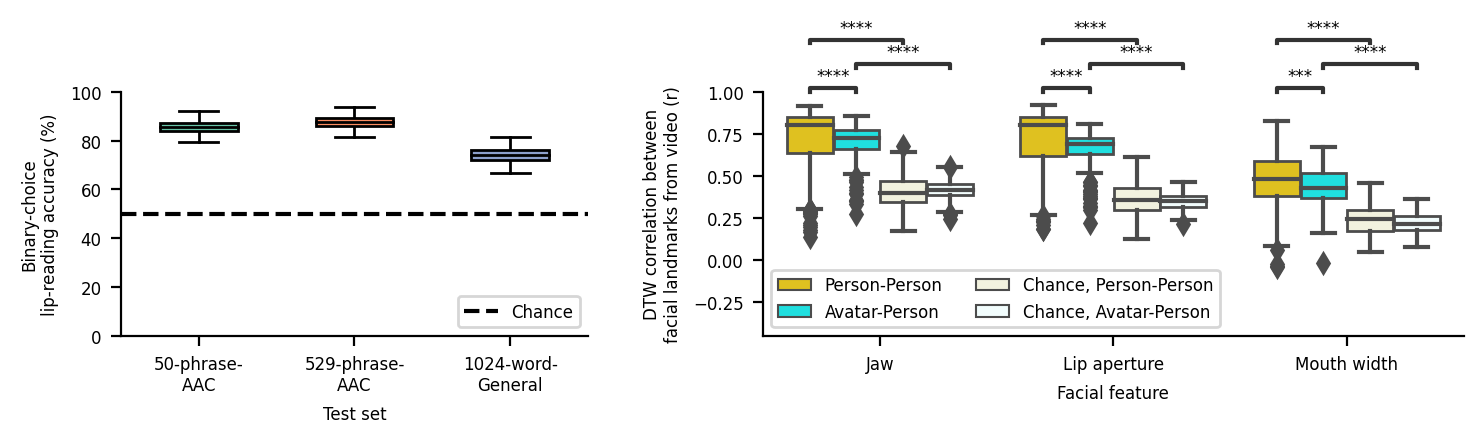

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statannot
from statannot import add_stat_annotation
import matplotlib as mpl
# plot the panels 4b and 4c
box_width = 0.5
lw = 1
plt.rcParams.update({'font.size': 6})
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype']=42
plt.rcParams['svg.fonttype'] = 'none'

colors = sns.color_palette("Set2", 3)
axs = {}

fig, axs = plt.subplots(1,2,figsize=(22/2.54, 4.1/2.54),gridspec_kw={'width_ratios': [1, 1.5]},dpi=200)


ax = axs[0]
bx = ax.boxplot(panel_b, labels=['50-phrase-\nAAC', "529-phrase-\nAAC", "1024-word-\nGeneral"], widths=box_width, patch_artist=True, boxprops= dict(linewidth=lw), medianprops=dict(linewidth=lw, color='black')
, whiskerprops= dict(linewidth=lw, color='black'), capprops={"linewidth": lw}, showfliers=False)
for i, patch in enumerate(bx['boxes']):
    patch.set(facecolor=colors[i])
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0,120,20))
ax.set_xlabel('Test set')
ax.set_ylabel('Binary-choice\nlip-reading accuracy (%)')
ax.hlines(50, 0.5, 3.5, colors=None, linestyles='--', label='Chance', zorder=0, color='black')
ax.legend(loc=4)




ax = axs[1]
#### Note: The **** are fine with the bonferonni correction that is done here, so we are ok. 

mypal=['gold', 'aqua', 'beige', 'azure']
#d_c['flierprops']['markersize'] = 3
# order=d_c['order'], hue_order=d_c['hue_order'], palette=d_c['mypal'], flierprops=d_c['flierprops']
x_order = ['Jaw','Lip aperture','Mouth width']
hue_order = ['Person-Person','Avatar-Person','Chance, Person-Person','Chance, Avatar-Person']
sns.boxplot(ax=ax,x='artic', y='r-value', hue='Comparison', 
            order = x_order, hue_order = hue_order, data=panel_c,boxprops= dict(linewidth=lw),palette=mypal)
pvalue_thresholds= [[1e-4, "****"], [5e-4, "***"], [1e-2, "**"], [0.01, "*"], [1, "ns"]]
add_stat_annotation(ax, data=panel_c, x='artic', y='r-value', hue='Comparison', box_pairs=box_pairs, order=x_order, hue_order=hue_order,
                    test=None, loc='outside', verbose=2, 
                   pvalues=pcor, 
                   perform_stat_test=False,pvalue_thresholds=pvalue_thresholds)




ax.set_yticks([-.25,0, .25, .5, .75, 1])
ax.set_xlabel('Facial feature')
ax.set_ylim(-0.45, 1)
ax.set_ylabel('DTW correlation between\nfacial landmarks from video (r)')
sns.despine()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ncol=2)
plt.subplots_adjust(wspace=0.3)
plt.show()

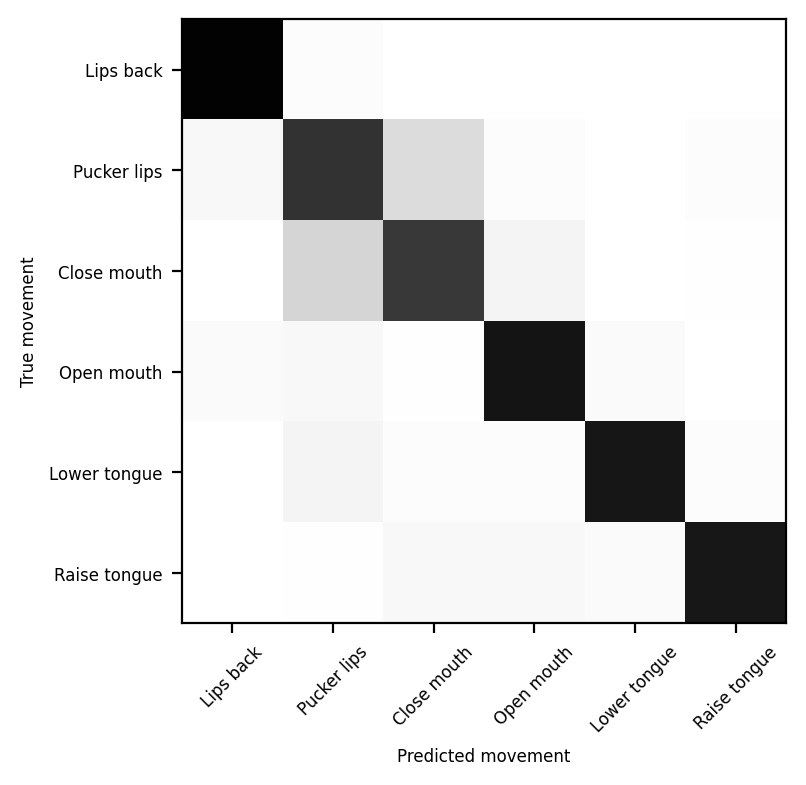

In [5]:
# plot the panel 4d
fig,ax = plt.subplots(dpi=200)
ax.imshow(panel_d*100,cmap='binary',vmin=0,vmax=100)
ax.set_xticks(range(panel_d.shape[0]))
ax.set_xticklabels(panel_d.columns,rotation=45)

ax.set_yticks(range(panel_d.shape[0]))
ax.set_yticklabels(panel_d.columns)
ax.set_xlabel('Predicted movement')
ax.set_ylabel('True movement')
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


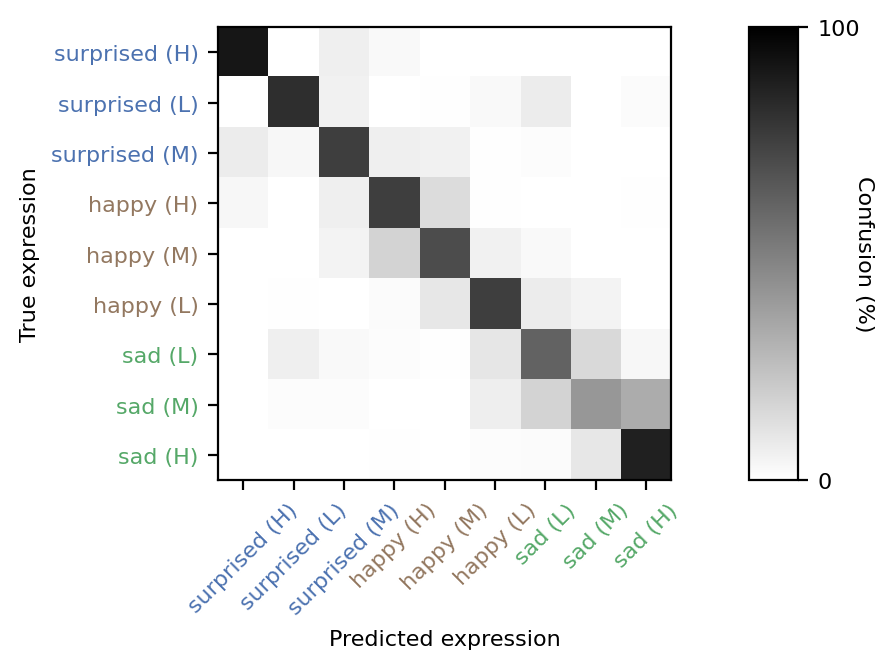

In [6]:
# plot the panel 4e
import seaborn as sns
import matplotlib.font_manager
import matplotlib as mpl
from gimutil_plotting import setup_figure
mpl.rcParams['font.sans-serif'] = ['Arial']
import matplotlib as mpl
from scipy.ndimage import gaussian_filter1d
from scipy.stats import sem
# Specifies plot parameters
rows = {
    'grid_start' : 0,
    'grid_stop'  : 350,   
    'total' : 350
}
cols = {
    'cm_start' : 0,
    'cm_stop'  : 350,
    'cbar_start': 300,
    'cbar_stop' : 320,
    'total'      : 350
}
all_panel_params = {
    'cm' : {'row_and_col_spec' : ('grid', 'cm')},
    'cbar': {'row_and_col_spec' : ('grid', 'cbar')}
    
}
hex_col = sns.color_palette("deep").as_hex()
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 8})

# Creates the plot
fig, axs = setup_figure(
    all_panel_params=all_panel_params, row_specs=rows, col_specs=cols,dpi=200,
    figsize=(5.5,3) #6,6
)


ax = axs['cm']
txt_lab = panel_e.columns.to_numpy()  

encodings_plot = ax.imshow(panel_e,cmap='binary',vmin=0,vmax=100)
ax.set_yticks(range(0,len(txt_lab)))
ax.set_xticks(range(0,len(txt_lab)))

ax.set_xticklabels(txt_lab,rotation=45)
ax.set_yticklabels(txt_lab)
ax.set_ylabel('True expression')
ax.set_xlabel('Predicted expression')
colors = [hex_col[0],hex_col[0],hex_col[0],hex_col[5],hex_col[5],hex_col[5],hex_col[2],hex_col[2],hex_col[2]]

for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)
for xtick, color in zip(ax.get_yticklabels(), colors):
    xtick.set_color(color)
ax = axs['cbar']
cbar_ticks = [0., 100.]
cbar = fig.colorbar(encodings_plot, cax=ax, ticks=cbar_ticks)
cbar.ax.set_ylim(cbar_ticks[0], cbar_ticks[-1])
cbar.set_label('Confusion (%)', rotation=270, labelpad=5.)
ax.yaxis.set_ticks_position('right')
plt.show()
